# PTDLUD#3 - ĐỒ ÁN THỰC HÀNH 1

19120148 - Lê Huỳnh Minh Tuấn

19120341 - Phạm Nhựt Quang

19120687 - Ngô Quốc Toại

19120692 - Phạm Minh Trí


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
df = pd.read_csv(
    "https://raw.githubusercontent.com/adishourya/Airbnb/master/new-york-city-airbnb-open-data/AB_NYC_2019.csv"
)
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


## Quan sát và mô tả dữ liệu

### 1/ Cho biết kiểu dữ liệu của các thuộc tính

In [ ]:
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### 2/ Đối với cột Price, cho biết:

#### Giá phòng cao nhất, thấp nhất, giá phòng trung bình, mức giá xuất hiện nhiều

In [ ]:
print("Giá phòng cao nhất:\t\t", df["price"].max())
print("Giá phòng thấp nhất:\t\t", df["price"].min())
print("Giá phòng trung bình:\t\t", df["price"].mean())
print("Giá phòng xuất hiện nhiều nhất:\t", list(df["price"].mode()))

Giá phòng cao nhất:		 10000
Giá phòng thấp nhất:		 0
Giá phòng trung bình:		 152.7206871868289
Giá phòng xuất hiện nhiều nhất:	 [100]


#### Độ lệch chuẩn của cột price?

In [ ]:
print("Độ lệch chuẩn:", df["price"].std())

Độ lệch chuẩn: 240.15416974718758


#### Cho biết giá phòng phân phối xung quanh trung tâm hay cách xa trung tâm? Nhận xét về giá trị mean và median của tập dữ liệu.

In [ ]:
print("Median của dữ liệu:", df["price"].median())
print("Mode của dữ liệu:", df["price"].median())
q_25 = df["price"].quantile(q=0.25)
q_75 = df["price"].quantile(q=0.75)
print(f"Dữ liệu từ 25% - 75% chạy trong khoảng: {q_25} - {q_75}")
print("=> Vậy dữ liệu tập trung tại trung tâm")

Median của dữ liệu: 106.0
Mode của dữ liệu: 106.0
Dữ liệu từ 25% - 75% chạy trong khoảng: 69.0 - 175.0
=> Vậy dữ liệu tập trung tại trung tâm


In [ ]:
print("Median của dữ liệu:", df["price"].median())
print("Mean của dữ liệu:", df["price"].mean())
print("=> Ta thấy mean cách xa median")

Median của dữ liệu: 106.0
Mean của dữ liệu: 152.7206871868289
=> Ta thấy mean cách xa median


#### Vẽ đồ thị histogram để nhận xét dữ liệu có bị lệch không?

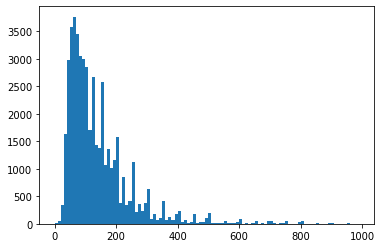


=> Dữ liệu lệch trái


In [ ]:
plt.hist(df["price"], bins=range(0, 1000, 10))
plt.plot()
plt.show()

print("\n=> Dữ liệu lệch trái")

### 3/ Mô tả số lượng missing value của mỗi thuộc tính

In [ ]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

### 4/ Tính tỷ lệ % missing value của mỗi thuộc tính

In [ ]:
missing_value_percent = pd.DataFrame({
    'column': df.columns,
    'percent of missing': (df.isnull().sum() * 100 / len(df)).round(2).values,
})
missing_value_percent

,column,percent of missing
0,id,0.00
1,name,0.03
2,host_id,0.00
3,host_name,0.04
4,neighbourhood_group,0.00
5,neighbourhood,0.00
6,latitude,0.00
7,longitude,0.00
8,room_type,0.00
9,price,0.00


### 5/ Xử lý dữ liệu missing (nhóm sinh viên tự đề xuất giữa remove hoặc fill giá trị missing value). GIải thích lý do.

Các cột có missing value là

In [ ]:
missing_value_cols = missing_value_percent[
    missing_value_percent["percent of missing"] != 0
]["column"].values

for col in missing_value_cols:
    print(col)

name
host_name
last_review
reviews_per_month


Đối với cột name và host_name việc fill bằng một giá trị nào đó thì hơi vô nghĩa. Và missing value chiếm tỉ lệ rất thấp (0.03% và 0.04%).

=> Vì vậy chúng ta có thể drop các dòng có missing value

In [ ]:
df = df.dropna(subset=['name', 'host_name'])

Cột reviews_per_month có giá trị null khi tần suất review mỗi tháng là 0

=> Chúng ta có thể replace missing value bằng số 0

In [ ]:
df['reviews_per_month'].fillna(0,inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


Đối với cột last_review, cột này cho biết lần review cuối cùng được diễn ra vào thời gian nào. Cột này mang giá trị null <=> nơi đó không chưa được review, nếu ta fill một gía trị nào đó thì sẽ mâu thuẫn.

Và missing value chiếm tời 20.56% số dòng => không nên remove theo dòng 

=> Chúng ta có thể remove theo cột

### 6/ Outlier: sử dụng đồ thị boxplot để quan sát cột Price có tồn tại outlier không?

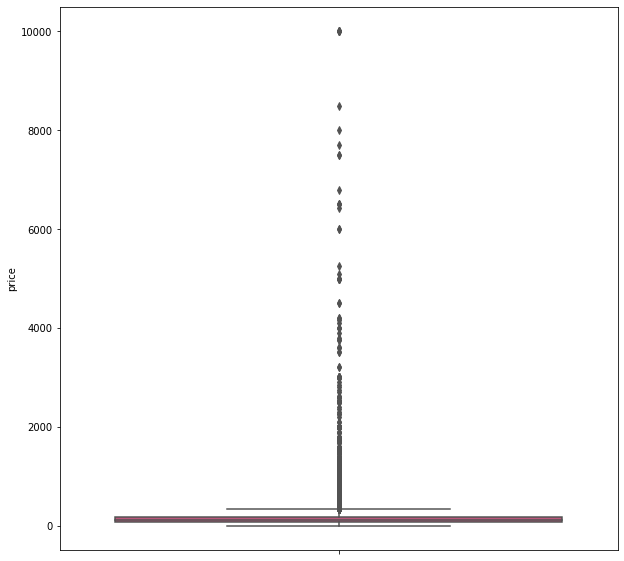

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(data=df, y='price',palette='plasma')

-> Có vẻ như là có outlier, kiểm tra lại dữ liệu xem có thật sự như vậy

In [ ]:
# Đếm số lần giá xuất hiện
df['price'].value_counts().sort_index()

0        11
10       17
11        3
12        4
13        1
         ..
7703      1
8000      1
8500      1
9999      3
10000     3
Name: price, Length: 674, dtype: int64

Ta thấy giá trị 'price' trong khoảng [0, 10000]
- Những căn hộ cho thuê với giá tầm 10000 thì hoàn toàn có thể có với giá đó => đây không phải outlier
- Những căn hộ cho thuê với giá 0 thì vô lý vì không ai muốn cho thuê nhà với giá free cả => đây là outlier => xoá các dòng với 'price' == 0

In [ ]:
df = df[df['price'] != 0]

## Visualize dữ liệu dạng bảng hoặc đồ thị:

### 1/ Có bao nhiêu “neighbourhood_group”, liệt kê không trùng danh sách này. Lập bảng thống kê gồm neighbourhood_group, tần suất, % lượt thuê phòng của mỗi neighbourhood_group.

In [ ]:
nei_group_val_count = df['neighbourhood_group'].value_counts()
print(f'Có', len(nei_group_val_count), '“neighbourhood_group”')

Có 5 “neighbourhood_group”


In [ ]:
print(nei_group_val_count)

Manhattan        21642
Brooklyn         20080
Queens            5664
Bronx             1088
Staten Island      373
Name: neighbourhood_group, dtype: int64


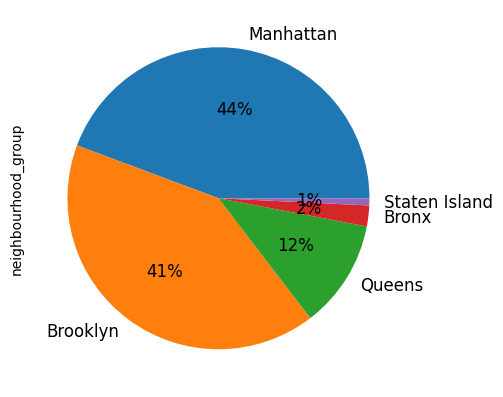

In [ ]:
fig = plt.figure(figsize=(5,5), dpi=100)
df['neighbourhood_group'].value_counts().plot(kind='pie',  autopct='%1.0f%%', startangle=360, fontsize=12)

### 2/ Có bao nhiêu room_type, liệt kê không trùng. Lập bảng thống kê room_type, tần suất và % lượt thuê cho từng room_type. Vẽ bar chart để so sánh.

In [ ]:
df['room_type'].value_counts()

Entire home/apt    25391
Private room       22299
Shared room         1157
Name: room_type, dtype: int64

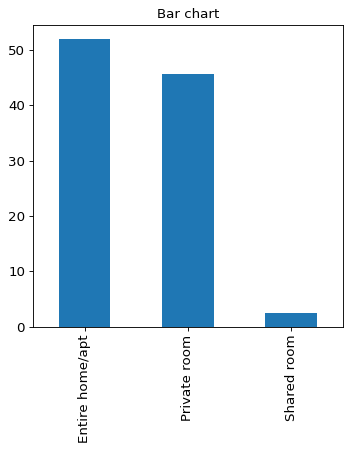

In [ ]:
fig = plt.figure(figsize=(5,5), dpi=80)
df['room_type'].value_counts(normalize=True).mul(100).round(2).plot(kind='bar', fontsize=12, title="Bar chart")

### 3/ Giá trung bình mỗi đêm là bao nhiêu?

In [ ]:
df['price'].mean()

152.77470469015498

### 4/ Có sự khác biệt gì giữa lưu trú tại Shared room và Entire Room giữa các vùng lân cận?

In [ ]:
shared_r_df = df[df['room_type'] == 'Shared room']
entire_r_df = df[df['room_type'] == 'Entire home/apt']
shared_r_groupby_nei_gr = shared_r_df.groupby('neighbourhood_group')
entire_r_groupby_nei_gr = entire_r_df.groupby('neighbourhood_group')

In [ ]:
neighbourhood_groups = df['neighbourhood_group'].unique()

So sánh số lượng shared room và entire room tại các vùng lân cận

In [ ]:
shared_r_count = shared_r_groupby_nei_gr['id'].count().values
entire_r_count = entire_r_groupby_nei_gr['id'].count().values

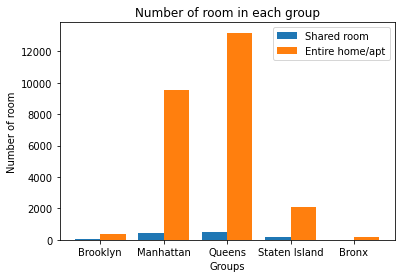

In [ ]:
X_axis = np.arange(len(neighbourhood_groups))
  
plt.bar(X_axis - 0.2, shared_r_count, 0.4, label = 'Shared room')
plt.bar(X_axis + 0.2, entire_r_count, 0.4, label = 'Entire home/apt')
  
plt.xticks(X_axis, neighbourhood_groups)
plt.xlabel("Groups")
plt.ylabel("Number of room")
plt.title("Number of room in each group")
plt.legend()
plt.show()

Vậy trong một vùng, số lượng của entire room cao hơn tuyệt đối so với số lượng shared room

So sánh giá phòng

In [ ]:
shared_r_mean_price = shared_r_groupby_nei_gr['price'].mean().values
entire_r_mean_price = entire_r_groupby_nei_gr['price'].mean().values

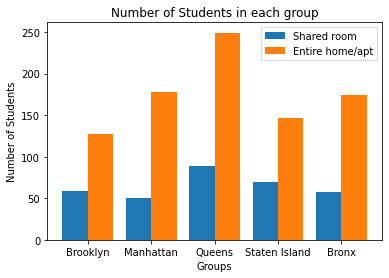

In [ ]:
X_axis = np.arange(len(neighbourhood_groups))

plt.bar(X_axis - 0.2, shared_r_mean_price, 0.4, label = 'Shared room')
plt.bar(X_axis + 0.2, entire_r_mean_price, 0.4, label = 'Entire home/apt')
  
plt.xticks(X_axis, neighbourhood_groups)
plt.xlabel("Groups")
plt.ylabel("Price")
plt.title("Price in each group")
plt.legend()
plt.show()

Ở cùng một vùng thì giá trung bình của entire room cũng cao hơn nhiều so với giá trung bình của shared room

### 5/ Giá trung bình cho các Private room như thế nào? LIệt kê bảng dữ liệu và vẽ biểu đồ so sánh.

In [ ]:
private_r_df = df[df['room_type'] == 'Private room']
print('Giá trung bình của private room:', private_r_df['price'].mean().round(2))

Giá trung bình của private room: 89.82


<BarContainer object of 3 artists>

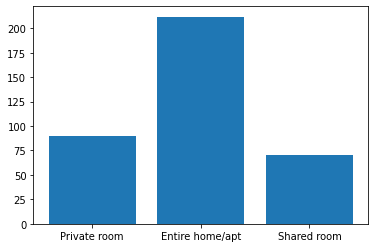

In [ ]:
plt.bar(['Private room', 'Entire home/apt', 'Shared room'], [private_r_df['price'].mean(), entire_r_df['price'].mean(), shared_r_df['price'].mean()])

Gias trung bình của Private room lơn hơn giá trung bình của Shared room tương đối và nhỏ hơn nhiều giá trung bình của Entire home/apt

### 6/ Vùng nào là nơi lưu trú rẻ nhất?

In [ ]:
mean_price_each_nei_gr = df.groupby(by='neighbourhood_group')[['price']].mean()
mean_price_each_nei_gr[mean_price_each_nei_gr['price'] == mean_price_each_nei_gr['price'].min()]

,price
neighbourhood_group,
Bronx,87.549632


=> Bronx là vùng có giá lưu trú trung bình rẻ nhất

### 7/ Giá trung bình của từng loại phòng ở các vùng lân cận?

In [ ]:
df.groupby(by=['neighbourhood_group', 'room_type'])[['price']].mean()

price
neighbourhood_group room_type                  
Bronx               Entire home/apt  127.645503
                    Private room      66.890937
                    Shared room       58.610169
Brooklyn            Entire home/apt  178.381281
                    Private room      76.555995
                    Shared room       50.773723
Manhattan           Entire home/apt  249.257108
                    Private room     116.805594
                    Shared room       88.977083
Queens              Entire home/apt  147.050573
                    Private room      71.776855
                    Shared room       69.020202
Staten Island       Entire home/apt  173.846591
                    Private room      62.292553
                    Shared room       57.444444